# Reading raster files

[Rasterio](https://mapbox.github.io/rasterio/) is a highly useful module for raster processing which you can use for reading and writing [several different raster formats](http://www.gdal.org/formats_list.html) in Python. Rasterio is based on [GDAL](http://www.gdal.org/) and Python automatically registers all known GDAL drivers for reading supported formats when importing the module. Most common file formats include for example [TIFF and GeoTIFF](http://www.gdal.org/frmt_gtiff.html), [ASCII Grid](http://www.gdal.org/frmt_various.html#AAIGrid) and [Erdas Imagine .img](http://www.gdal.org/frmt_hfa.html) -files.

[Landsat 8](http://landsat.gsfc.nasa.gov/landsat-8/landsat-8-bands) bands are stored as separate GeoTIFF -files in the original package. Each band contains information of surface reflectance from different ranges of the electromagnetic spectrum.

### Download data

**Download the data** package from [here](http://www.helsinki.fi/science/accessibility/opetus/autogis/L5_data.zip). The package contains various TIF-files that will be explored during the tutorials. 

Let's start with inspecting one of the files we downloaded:


In [1]:
import xarray as xr

url = "https://a3s.fi/swift/v1/AUTH_0914d8aff9684df589041a759b549fc2/PythonGIS/elevation/kilimanjaro/ASTGTMV003_S03E036_dem.tif"
data1 = xr.open_dataset(url)
data2 = xr.open_rasterio(url).squeeze("band", drop=True).to_dataset(name="elevation")


In [2]:
type(data1)

xarray.core.dataset.Dataset

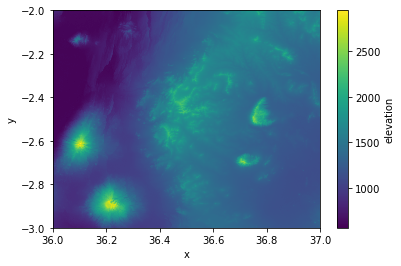

In [3]:
data2["elevation"].plot()

In [16]:
import rasterio
import os
import numpy as np
%matplotlib inline

# Data dir
data_dir = "L5_data"
fp = os.path.join(data_dir, "Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif")

# Open the file:
raster = rasterio.open(fp)

# Check type of the variable 'raster'
type(raster)

rasterio.io.DatasetReader

Okey so from here we can see that our `raster` variable is a `rasterio._io.RasterReader` type which means that we have opened the file for reading.

## Read raster file properties

Let's have a closer look at the properties of the file:

In [5]:
# Projection
raster.crs

CRS({'proj': 'tmerc', 'lat_0': 0, 'lon_0': -183, 'k': 0.9996, 'x_0': 500000, 'y_0': 0, 'datum': 'WGS84', 'units': 'm', 'no_defs': True})

In [6]:
# Affine transform (how raster is scaled, rotated, skewed, and/or translated)
raster.transform


Affine(28.5, 0.0, 698592.0,
       0.0, -28.5, 6697870.5)

In [7]:
# Dimensions
print(raster.width)
print(raster.height)


1288
1439


In [8]:
# Number of bands
raster.count


7

In [9]:
# Bounds of the file
raster.bounds


BoundingBox(left=698592.0, bottom=6656859.0, right=735300.0, top=6697870.5)

In [10]:
# Driver (data format)
raster.driver

'GTiff'

In [11]:
# No data values for all channels
raster.nodatavals

(None, None, None, None, None, None, None)

In [12]:
# All Metadata for the whole raster dataset
raster.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 1288,
 'height': 1439,
 'count': 7,
 'crs': CRS({'proj': 'tmerc', 'lat_0': 0, 'lon_0': -183, 'k': 0.9996, 'x_0': 500000, 'y_0': 0, 'datum': 'WGS84', 'units': 'm', 'no_defs': True}),
 'transform': Affine(28.5, 0.0, 698592.0,
        0.0, -28.5, 6697870.5)}

## Get raster bands

Different bands of a satellite images are often stacked together in one raster dataset. In our case, all seven bands of the Landsat 8 scene are included in our GeoTIFF and the `count` is hence 7.

In order to have a closer look at the values stored in the band, we will take advantage of the [GDAL Band API](http://gdal.org/python/osgeo.gdal.Band-class.html).


In [14]:
# Read the raster band as separate variable
band1 = raster.read(1)

# Check type of the variable 'band'
print(type(band1))

# Data type of the values
print(band1.dtype)

<class 'numpy.ndarray'>
uint8


Now we have the values of the raster band stored in the variable `band1`.

Data type of the band can be interpreted with the help of GDAL documentation on [Pixel data types](http://www.gdal.org/gdal_8h.html#a22e22ce0a55036a96f652765793fb7a4). Unsigned integer is always equal or greater than zero and signed integer can store also negative values. For example, an unsigned 16-bit integer can store 2^16 (=65,536) values ranging from 0 to 65,535.


## Band statistics

Next, let's have a look at the values that are stored in the band. As the values of the bands are stored as numpy arrays, it is extremely easy to calculate basic statistics by using basic numpy functions.

In [18]:
# Read all bands
array = raster.read()

# Calculate statistics for each band
stats = []
for band in array:
    stats.append({
        'min': band.min(),
        'mean': band.mean(),
        'median': np.median(band),
        'max': band.max()})

# Show stats for each channel
stats

[{'min': 0, 'mean': 59.63132232528628, 'median': 61.0, 'max': 255},
 {'min': 0, 'mean': 43.13342814842951, 'median': 43.0, 'max': 255},
 {'min': 0, 'mean': 36.29418775547201, 'median': 31.0, 'max': 255},
 {'min': 0, 'mean': 35.0946303937776, 'median': 13.0, 'max': 255},
 {'min': 0, 'mean': 37.63263502518571, 'median': 13.0, 'max': 255},
 {'min': 0, 'mean': 105.8221477777442, 'median': 114.0, 'max': 175},
 {'min': 0, 'mean': 26.28348760569581, 'median': 14.0, 'max': 255}]